# Sezione 6: modelli di classificazione non lineare
### Lezioni 35 - 47 


#### K-Nearest Neighbor (K-NN)

E' un modello di classificazione. Partiamo dal suo precursore: i Nearest Neighbor, che esegue una classificazione cercando all'interno del dataset l'esempio piu simile a quello che vogliamo classificare.
Questo tipo di algoritmi sono definiti 'Lazy', cioè pigri, perchè piuttosto che apprendere dai dati si limitano a memorizzarli.
Per poter confrontare gli esempi ci serve una metrica per poter calcolare la distaza, ed abbiamo diverse opzioni per questo:
Distanza euclidea: ci permette di trovare il segmento piu breve che connette due punti.
Distanza di Manhattan, detta geometria del tai, che trova la distanza minore usando solo segmenti orizzontali e verticali.
Distanza di Minkowsky, che non è altro che una generalizzazione della distanza euclidea e di manhattan, infattiutilizzando p = 2 otterremo la distanza euclidea, mentre con p = 1 otterremo quella di manhattan.
Ora possiamo affrontare il K-NN.
Il K-NN piuttosto che cercare un unico esempio maggiormente simile, se ne cerca un numero arbitrario. L classe predetta sara quella piu presente fra questi esmpi trovati: i nearest neughbor.
K è il numero di esempi vicini da cercare, e permette di controllare la complessita del metodo: ad un numero minore di K corrisponde una complessita maggiore. Solitamente un buon valore di K è 5.
Per capire meglio guarda il video della lezione 35:
scegliamo il valore di K,
scegliamo la metrica per calcolare la distanza fra gli esempi
calcoliamo la distanza fra l'esempio da classificare e tutti gli esempi del dataset,e scegliamo i 5 esempi piu simili, cioe quelli con la distanza minore.
Se si ha un pareggio fra due classi, bisogna selezionarela classe con la distanza minore con l'esempio che stiamo provando a classificare.
Vediamo pro e contro di questo modello.
Pro:
E' estremamnte semplice,
Non avendo una vera e propria fase di addestramento, si adattera subito a nuovi dati non appena vengono inseriti nel dataset.
Contro:
Su dataset molto grandi, diventa molto dispendioso in termini di risorse di calcolo, dato che per ogni esempio da classificare bisogna effettuare un confronto con ogni altro esempio del dataset,
Bisogna scegliere la metrica corretta da utilizzare e nn esiste una regola universale per farlo.


#### K-NN in Python

useremi il K-NN per eseguire una classificazione dei dati scritti a mano che ci fornisce scikitlearn (quella usato per la lezione precedente sulla classificazione multiclasse

In [8]:
# importiamo tutte le librerie che ci serviranno:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
# e carichiamo il dataset con la funzione load_digits di scikitlearn:

digits = load_digits()

# e creiamo gli array numpy con le proprieta e con il target:

X = digits.data
Y = digits.target

# e creiamo gli array per addestramento e per test:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [10]:
#Trattandosi di immagini, conviene normalizzare il dataset per avere valri compresi fra 0 e 1 piuttosto che fra 0 e 255:

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [11]:
# Adesso possimao costruire il modello, e per farlo usiamo la classe KNeighborsClassifier di scikitlearn:
    
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
    
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Facciamo delle predizioni su trainset e test set per verificarne la validita e per vedere se soffre di overfitting

In [12]:
Y_pred_train = knn.predict(X_train)
Y_prob_train = knn.predict_proba(X_train)

# Queste sono sul trainset, ora le facciamo sul testset:

Y_pred_test = knn.predict(X_test)
Y_prob_test = knn.predict_proba(X_test)


In [13]:
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)
loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)
    
print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

NameError: name 'y_pred_train' is not defined

L'accuracy va bene si aper il trainset che per il testset, e non sembra quindi esserci problema di overfitting, e va bene anche il logloss.
Possiamo fare di meglio: Vediamo cosa succede se facciamo variare il valore di K:
Quindi creiamo diversi modelli per diversi valori di K.


In [14]:
Ks = [1,2,3,4,5,7,10,12,15,20]

for K in Ks:
    print("K="+str(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,Y_train)
    
    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    accuracy_train = accuracy_score(Y_train, y_pred_train)
    accuracy_test = accuracy_score(Y_test, y_pred)

    loss_train = log_loss(Y_train, y_prob_train)
    loss_test = log_loss(Y_test, y_prob)
    
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))
    

K=1
ACCURACY: TRAIN=1.0000 TEST=0.9889
LOG LOSS: TRAIN=0.0000 TEST=0.3838
K=2
ACCURACY: TRAIN=0.9897 TEST=0.9833
LOG LOSS: TRAIN=0.0099 TEST=0.2060
K=3
ACCURACY: TRAIN=0.9912 TEST=0.9889
LOG LOSS: TRAIN=0.0164 TEST=0.1509
K=4
ACCURACY: TRAIN=0.9889 TEST=0.9796
LOG LOSS: TRAIN=0.0233 TEST=0.1557
K=5
ACCURACY: TRAIN=0.9897 TEST=0.9870
LOG LOSS: TRAIN=0.0295 TEST=0.1629
K=7
ACCURACY: TRAIN=0.9897 TEST=0.9815
LOG LOSS: TRAIN=0.0423 TEST=0.1767
K=10
ACCURACY: TRAIN=0.9825 TEST=0.9741
LOG LOSS: TRAIN=0.0584 TEST=0.1326
K=12
ACCURACY: TRAIN=0.9809 TEST=0.9741
LOG LOSS: TRAIN=0.0668 TEST=0.1449
K=15
ACCURACY: TRAIN=0.9801 TEST=0.9685
LOG LOSS: TRAIN=0.0823 TEST=0.1587
K=20
ACCURACY: TRAIN=0.9745 TEST=0.9593
LOG LOSS: TRAIN=0.1076 TEST=0.1854


Il valore di K conolla la complessita del modello:
ad un valore minore corrisponde una complessita maggiore,e quindi un rischio di overfitting piu alto.
Per K=1 ci fa pensare a un problema di overfitting.
Sembrerebbe che il modello migliore si abbia per K=3 , anche se la loss migliore la otteniamo per K=10 ,a discapito di un accuracy minore.

Pendiamo il nostro modello per K=3 e proviamo a visualizzare le immagini che ha sbagliato a classificare:
Quindi riaddestriamo il nostro modello per K=3:
    

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
    
Y_pred = knn.predict(X_test)

import matplotlib.pyplot as plt

e facciamo un ciclo for su tutto il testset.
se la predizione del nostro modello non combacia con quella corretta, quindi è sbagliata, la predizione corretta 

Numero 8 classificato come 3 


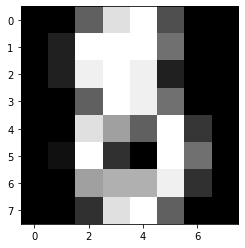

Numero 8 classificato come 3 


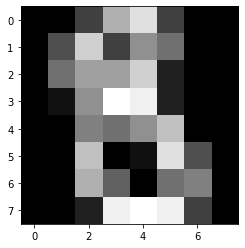

Numero 8 classificato come 9 


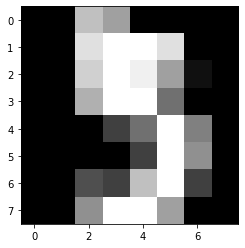

Numero 8 classificato come 7 


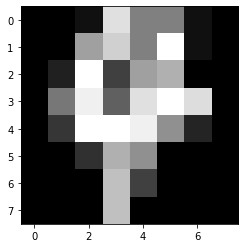

Numero 8 classificato come 5 


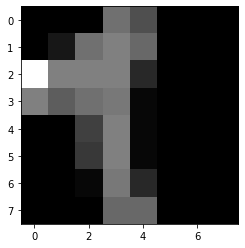

Numero 8 classificato come 6 


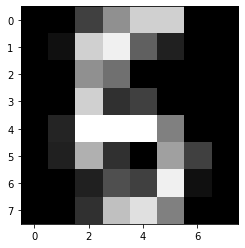

In [16]:
for i in range(0,len(X_test)):
    if(Y_pred[i] != Y_test[i]):
        print("Numero %d classificato come %d " % (Y_test[1], Y_pred[i]))
        
        plt.imshow(X_test[i].reshape([8,8]), cmap = "gray")
        plt.show()

Le immagini dove ha sbagliato erano difficilmente riconoscibili anche dall'occhio umano, quindi possimao idre che il nostro modello ha lavorato bene.

### Alberi decisionali

Sono un modello di classificazione molto diverso da quelli visti fino ad ora.
Diamo qualche informazione sulla teoria degli alberi:
In informatica un albero è una struttura dati che va letta dall'alto verso il basso, il punto di partenza è chiamato RADICE.
Gli elementi che connettono i vari punti dell'albero sono chiamati ARCHI.
Gli element che contengono le informazioni sono chiamati NODI.
Gli elementi di arrivo dell0albero sono chiamate FOGLIE.
Anche radice e foglie sono nodi: la radice con solo archi in uscita, mente le foglie con solo archi in entrata.

Adesso introduciamo gli alberi decisionali: un modello di machine learning che utilizza una struttura dati ad albero per contenere le informazioni ed effettuare le predizioni. Quello che fa un albero decisionale è apprendere dai dati una serie di domande che poi usera per eseguire le predizioni.
Sono molto usati da banche e gruppi assicirativi per decidire se concedere un prestito o fare assicurazioni.
Vediamo un esempio (video lezione 37)

Come fa un albero decisionale durante la fase di addestramento a decidere quali domande porre?
Lo fa scegliendo la domanda che massimizza il guadagno di informazioni. Per capire meglio cosa significa guarda il video.

La metrica che misura quanto è buono un guadagno si chiama IMPURITA', e vale 0 quando un nodo contiene sempi di un unica classe, in tale caso si dice che il nodo è puro, ed il nostro albero avra raggiunto una foglia.
L'obiettivo dell'addestramento è d riuscire ad arrivare alle folgie ponendo il minor numero di domande possibile.
Esistono diverse metriche per calcolare le impurità: le piu usate sono GINI ed ENTROPIA:
Non le approfondiamo dato che portano a risultati molto simili. In generale Gini è meno impegnativa dal punto di vista di calcolo, quindi nella pratica convverrebbe usare questa.
Ora proviamo a costruire un albero decisionale, dando per scontato che gli split che andremo a fare sono quelli corretti (vedi video...)
La PROFONDITA' di un albero è definita come la lunghezza del percorso piu lungo che va dalla radice a una foglia.
Una maggiore profondita dell'albero corrisponde ad una maggiore complessita del modello, e quindi in un rischio maggiore di overfitting.

#### Alberi decisionali in Python

useremo un dataset che è un elenco dei passeggeri del titanic, e l'obiettivo è di riuscire a predire se un dato passeggero è sopravvissuto alla tragedia.


In [17]:
# importiamo le librerie necessarie:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score



In [18]:
# e carichiamo il dataset:

titanic = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


ci sono 8 colonne: 7 propreita e 1 target
e 887 esempi

In [19]:
# diamo uno sguardo ai primi 5 esempi:

titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


siccome il nostro scopo è solo di creare un albero decisionale andiamo a rimuovere la proprieta Name dal dataset, perche cosi com'è non da nessuna informaione significativa per il nostro modello.


In [20]:
titanic = titanic.drop("Name", axis = 1)

In [21]:
# eseguiamo anche il one hot encoding sulla proprieta Sex per creare una variabile di comodo:
titanic = pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [22]:
#creiamo gli array numpy per le proprieta e target:
X = titanic.drop("Survived", axis = 1).values
Y = titanic["Survived"].values

In [23]:
# e creiamo i dataset di training e di test:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [24]:
# diamo uno sguardo al nostro trainset:
X_train.shape

(620, 7)

Abbiamo 620 esempi e 7 proprieta per allenare il nostro modello.

Per gli alberi decisionali non è necessario normalizzare o standardizzare il dataset. Quindi possiamo proseguire con la creazione del nostro modello.

In [25]:
# importiamo la classe DecisionTreeClassifier da scikitlearn:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# creiamo il nostro albero instanziando la classe:

tree = DecisionTreeClassifier(criterion="gini")

Con il parametro criterion impostiamo la metrica legata all'impurita. Possiamo scegliere gini o entropy, che sono abbastanza analoghe, ma gini è meno impegnativa dal punto di vista dei calcoli. Comuqnue di default è impostata su gini, quindi potremmo omettere il parametro.

In [27]:
# addestriamo il nostro albero:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
# ed eseguiamo le predizioni su trainset e testset:
Y_pred_train = tree.predict(X_train)
Y_pred = tree.predict(X_test)

# e calcoliamo l'accuracy:
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

# e le stampiamo:

print("ACCURACY: Train=%.4f Test:%.4f" % (accuracy_train, accuracy_test))


ACCURACY: Train=0.9806 Test:0.7640


L'accuratezza del trainset è parecchio migliore di quella del testset, quindi il nostro Albero è troppo complesso e soffre di overfitting. 
La complessita di un albero è collegata alla sua profondita. Quindi proviamo a limitare la profondita dell'albero e vediamo re riusciamo a ridurre l'overfitting.
Possiamo ridurre la profondita massima dell'albero tramite il parametro max_depth, che va aggiunto agli argomenti della classe DecisionTreeClassifier. Proviamo a ridurla:



In [29]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 6)

# riaddestriamo il modello e ricalcoliamo le metriche:

tree.fit(X_train, Y_train)

Y_pred_train = tree.predict(X_train)
Y_pred = tree.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

print("ACCURACY: Train=%.4f Test:%.4f" % (accuracy_train, accuracy_test))



ACCURACY: Train=0.8935 Test:0.8202


Gia va molto meglio rispetto a prima: abbiamo un accuracy minore per il trainset, ma quella del testset è maggiore e c'è meno gap fra le 2.

Un altra caratteristica fantastica degli alberi è che possono essere semplicemente visualizzabili. Vediamo come:


In [30]:
# importiamo la funzione export_graphviz da scikitlearn:

from sklearn.tree import export_graphviz

In [31]:
# ora creiamo un file .dot e usiamo la funzione export_graphviz per scrivere il nostro albero dentro a questo file:
dotfile = open("tree.dot","w")
export_graphviz(tree, out_file = dotfile, feature_names = titanic.columns.drop("Survived"))
dotfile.close()

Ora troviamo il file tree.dot nella cartella che contiene il file python su cui stiamo lavorando, e possiamo aprirlo e visualizzarlo o con il programma gaphviz oppure su webgraphviz.com

#### Foreste casuali (random forest)

La random forest è un modello di machine learning che si basa su un tipo di apprendimento detto Ensemble, o apprendimento di insieme. Questo si basa su un unico principio: Un modello costruito mettendo insieme piu modelli è piu stabile e robusto dei modelli presi singolarmente. Quindi creando un modello tramite l'apprendimento ensemble si ottiene una migliore generalizzazione su dati sconosciuti e si abbassa il rischio di overfitting.

Una random forest usa l'apprendimento ensemble mettendo insieme piu alberi decisionali.
Si sceglie il numero di alberi che andranno a comporre la foresta.
un sottoinsieme casuale da dalaset e lo si utilizza per creare un albero decisionale.
Poi si ripetono gli ultimi due passaggi fino ad aver ottenuto tutti gli alberi che ci eravamo prefissati di creare.
Ora per eseguire una classificazione dovremo usare tutti gli alberi, ottenere una predizione per ognuno di essi e poi fare una media delle varie predizioni. Il risultato sara la predizione della random forest.
Il grosso vantaggio della foresta casuale è che ha un numero minimo di iperparametri, infatti l'unico di cui dobbiamo realmente preoccuparci è il numero di alberi che la formano. Solitamente un numeor di default è 10, ma incrementandolo si potrebbero ottenere risultati migliori, con il rischio di andare a consumare una quantita eccessiva di risorse di calcolo.

#### Random forest con Python


Riprendiamo il lavoro gia fatto sul dataset del titanic, per provare a implementare una random forest.
Le random forest sono dei modelli di insieme (ensamble method), e permette di creare diversi alberi decisionali e metterli insieme per creare un modello piu stabile e robusto.


In [32]:
# importiamo la classe RandomForestClassifier da scikitlearn:

from sklearn.ensemble import RandomForestClassifier

In [33]:
# creimao il modello instanziando la classe e impostiamo il parametro random_state a false in modo da creare risultati
# consistenti fra il modello che viene create nel video e quello che creo io:

forest = RandomForestClassifier(random_state = False)

In [34]:
# addestriamo il modello:
forest.fit(X_train, Y_train)

# e andiamo a eseguire delle predizioni su trainset e testset
#n in modo da poterli usare per calcolare l'accuracy e verificare la presenza di overfitting:

Y_pred_train = forest.predict(X_train)
Y_pred = forest.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

# stampiamo il risultato:

print("ACCURACY: TRAIN= %.4f  TEST= %.4f" %(accuracy_train, accuracy_test))

ACCURACY: TRAIN= 0.9629  TEST= 0.8127


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Il modello soffre di overfitting. Andiamo allora a limitare la profondita massima degli alberi decisionali:

In [35]:
forest = RandomForestClassifier(random_state = False, max_depth = 8)

forest.fit(X_train, Y_train)

Y_pred_train = forest.predict(X_train)
Y_pred = forest.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

print("ACCURACY: TRAIN= %.4f  TEST= %.4f" %(accuracy_train, accuracy_test))


ACCURACY: TRAIN= 0.9177  TEST= 0.8352


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Va gia meglio. Vediamo se riusciamo a fare ancora meglio aumentando il numero di alberi che alimentano la nostra foresta. Il numero di default di alberi è 10, aumentiamo a 30. Si fa tramite il parametro n_estimators della classe. Piu il numero di alberi è elevato e migliore sara l'accuratezza della classificazione, ma aumentera anche il tempo e le risorse necessarie al calcolo. Per dataset piccoli, come questo che stiamo usando, il problema non sussiste.


In [36]:
forest = RandomForestClassifier(random_state = False, max_depth = 8, n_estimators = 30)

forest.fit(X_train, Y_train)

Y_pred_train = forest.predict(X_train)
Y_pred = forest.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

print("ACCURACY: TRAIN= %.4f  TEST= %.4f" %(accuracy_train, accuracy_test))

ACCURACY: TRAIN= 0.9161  TEST= 0.8577


Il risultato è ancora migliore.

### Macchine a vettori di supporto (SVM, Support Vectore Machines)

E' un modello di classificazione lineare.
Il problema della classificazione viene affrontato in maniera diversa da quanto visto fino ad ora.
Infatti lo scopo di una SVM è trovare la retta che massimizza il margine fra le classi, cioè lo spazio che le separa, e lo fa utilizzando una minuscola parte del dataset. Gli esempi che vengono usati in questa fase vengono ciamati Vettori di supporto, perche sono gli unici che supportano la creazione del modello. Tutti gli altri esempi sono ininfluenti per il modello.
Questo approcchio offre alcuni vantaggi:
una ottima resistenza agli outlayers, dato che non li considera proprio.

Un margine maggiore che separa le classi corrisponde ad errore di generalizzazione minore e quindi ad un modello migliore.
Una svm usa un approccio all'apprendimento che si puo riassumere con la seguente frase: 'Se riesco a classificare i casi piu difficili allora classificare gli altri sara una passeggiata'. ( i casi piu difficili sono quelli che ricadono vicino alla curva che separa le classi) dal video della lezione 41 è tutto piu chiaro...


Ora costruiamo una Macchina a vettori di supporto, SVM, per classificare i fiori dell' Iris dataset in base alla classe di appartenenza.

In [37]:
# importiamo le librerie necessarie:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [38]:
# e carichiamo il dataset direttamente da dall'archivio dell'uci:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Abbiamo a disposizione 150 esempi, ognuno con 5 colonne: 4 proprieta e un target

In [39]:
# vediamo i primi 5 esempi del dataset:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


La variabile target è rappresentata da una stringa e quindi dobbiamo fare l'encoding.
Per prima cosa pero creiamo gli array numpy:

In [40]:
X = iris.drop("class", axis = 1).values
Y = iris["class"].values

In [41]:
# creiamo gli array per addestramento e test:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [42]:
# ora possimao fare l'encoding:
#instaziamo la classe LabelEncoder:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [43]:
# possiamo standardizzare i valori visto che sono in un range leggermente differente:
# instanziamo la classe standardScaler:

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [44]:
# Il dataset è pronto. Cominciamo costruendo un modello usando solo due proprieta, 
# in modo poi da poter poi visualizzare i bordi decisionali (decision boundary) che il modello ha imparato dai dati.

# quindi creiamo un sotto-dataset contenente soltanto due proprieta, le prime due:

X2_train = X_train[:,:2]
X2_test = X_test[:,:2]

In [45]:
# adesso costruiamo la nostra prima SVM e addestriamola su questi dataset:
# importiamo la classe linearSVC da scikitlearn:

from sklearn.svm import LinearSVC

In [46]:
# instanziamo la classe:
svc = LinearSVC()
svc.fit(X2_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
# e calcoliamo le nostre metriche. Non si puo calcolare la log_loss, perche questa ha bisogno non delle predizione delle 
#classi, ma della probabilita di appartenenza ad una classe, e una SVM non calcola direttamente le probabilita. 
# per farlo c'è bisogno di ulteriori passaggi che rallentano sensibilmente i processo.
# Quindi calcoliamo l'accuracy: per farlo usiamo direttamente il metodo score della classe svc,
# che prende in input direttamente le proprieta, esegue la predizione e calcola l'accuracy.

print("ACCURACY con 2 proprietà: Train=%.4f Test=%.4f" % (svc.score(X2_train, Y_train), svc.score(X2_test, Y_test)))

ACCURACY con 2 proprietà: Train=0.8286 Test=0.6889


Questo modello presenta overfitting. Potremmo provare a migliorarlo lavorando sul parametro di regolarizzazione, in questo caso c, ma non ne vale la pena dato che è un modello che abbiamo costruito soltanto per poter visualizzare i bordi decisionali. Quindi piuttosto stampiamo i bordi e poi andiamo a costruire il modello definitivo con tutte le proprieta.

Per visualizzare i bordi usiamo una funzione scritta dal tipo del video,plot_bounds, che sta nel notebook relativo a uesta lezione.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [19]:
def plot_bounds(X,Y,model=None,classes=None, figsize=(8,6)):
        
    plt.figure(figsize=figsize)
        
    if(model):
        X_train, X_test = X
        Y_train, Y_test = Y
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)
    
    plt.show()


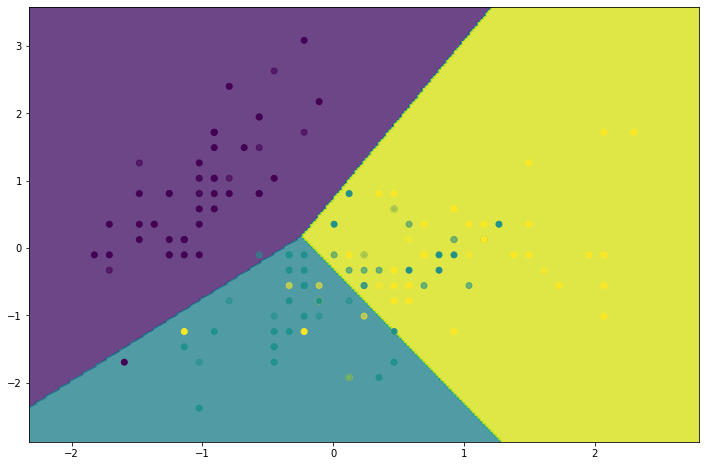

In [51]:
plot_bounds((X2_train,X2_test),(Y_train,Y_test),svc,figsize=(12,8))

Un SVM cosi come l'abbiamo usata adesso è un modello di classificazione lineare, per questo i bordi decisionali sono lineari.
Comunque è riuscito a classificare perfettamente la classe in viola, mentre per le altre due classi ci sono un po di problemi, ma considerando come sono distribuiti i dati, questo dataset avrebbe creato molti grattacapi anche con un modello di classificazione non lineare.
Proviamo adesso a costruire un modello usando tutte le proprieta:


In [52]:
# Riutilizziamo la classe gia usata svc e rifacciamo l'addestramento sul dataset con tutte le proprieta:
svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [54]:
print("ACCURACY con tutte le  proprietà: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test, Y_test)))

ACCURACY con tutte le  proprietà: Train=0.9429 Test=0.9556


I risultati sono migliori

### Kernel SVM

vediamo come è possibile usare una SVM per eseguire classificazioni non lineari, usando il Kernel Trick.
guarda il video della lezione 43.
i dati non sono divisibili in classi tramite una retta.
Il kernel trick usa una funzione Kernel, hè è sostanzialmente una metrica della somiglianza fra due esempi.
Ne esistono diverse e la piu usata è il kernel gaussiano, noto come radial basis e spesso abbreviato in rbf.E' il kernel generico da usare quando non si sa come operare.
Quando due esempi sono molto diversi questa funzione tende a 0, mentre quando sonomolto simili tende a 1.
La costante sigma è un parametro che dobbiamo impostare noi, e controlla la sensibilita alla differenza fra due esempi. Con un valore di sigma piu piccolo, una differena maggiore fra due esempi sara maggiormente penalizzata, e quindi tendera a 0 piu facilmente.

Altri kernel cono il sigmoidale e il polinomiale, che sebbene nella pratica non abbiano gli stessi risultati diel rbf, vale la pena provarli durante la fase del tuning degli iperparametri nel caso in cui i risultati dati dall' rbf non siano soddisfacenti.

##### Kernel SVM in Python
Useremo una SVM insieme a  d una funzione kernel per eseguire delle classificaizoni su un dataset che presenta delle relazioni non lineari. A questo scop creeremo ad hoc un dataset. Per farlo scikitlearn ci mette a disposizione diverse funzioni. Una di qeste è make_circles.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_circles

In [4]:
X, Y = make_circles(noise = 0.2, factor = 0.5, random_state=1)
# il parametro noise ci permette di aggiungere rumore ai dati,
# il parametro factor = 0.5 fa in modo che gli esempi della classe positiva siano distribuiti verso il centro del grafico
# random state=1 fa in modo che il dataset che ottienee nel video sia uguale a quello che ottengo io.


In [5]:
X.shape

(100, 2)

Il dataset che abbiamo appena costruito contiene 100 esempi e 2 proprieta.

Proviamo a costruire uno scatterplot per vedere come sono distribuiti i dati:
mettiamo la prima proprieta come cordinata x e la seconda proprieta come cordinata y, e usiamo il target per specificare il colore del pallino.

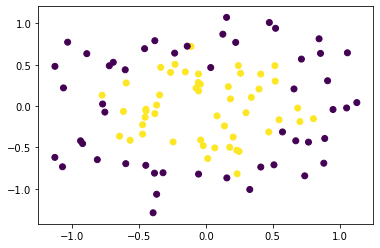

In [6]:
plt.scatter(X[:,0],X[:,1], c=Y)

Vediamo se riusciamo a eseguire una classificazione:
    

In [7]:
# creiamo gli array per addestramento e test:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
# adesso costruiamo la nostra Kernel SVM, ovvero la macchina a vettori di supporto(SVM) che utilizza una funzione kernel 
# per proiettare i dati in uno spazio dimensionale maggiore su cui poi provare ad eseguire la classificazione:
# quindi importiamo la classe svc di scikitlearn:

from sklearn.svm import SVC

# la instanziamo specificando all'interno del parametro kernel la funzione kernel che vogliamo utuilizzare: 
# iniziamo dalla lineare, che equivale ad usare la classe Linear_svc che abbiamo gia usato in precedenza.
# impostiamo anche il parametro probability a True per fare in modo che questa volta la SVM calcoli anche 
# la probabilita di appartenenza ad una classe. Questo in generale rallenta di molto i calcoli, ma per un dataset cosi piccolo 
# va bene lo stesso.


svc = SVC(kernel = "linear", probability = True) 



In [14]:
# eseguiamo l'addestramento:

svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
# e calcoliamo l'accuracy:

print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY: Train=0.5143 Test=0.4667


I risultati sono molto scarsi.
Proviamo a visualizzare i decision boundary che il modello ha appreso con la funzione plot_bounds:


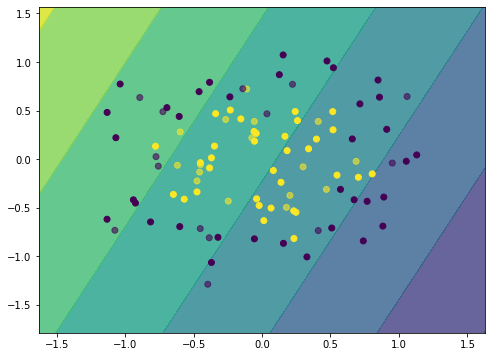

In [20]:
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

I decision bundary sono lineari, un colore piu marcato verso il giallo o verso il viola rappresenta indica una probabilita maggiore di apparteneneza ad una o l'altra classe.

Ora proviamo con un altro kernel: il kernel gaussaino (o radial basis, abbreviato con rbf):

In [21]:
svc = SVC(kernel = "rbf", probability = True) 


svc.fit(X_train, Y_train)

print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY: Train=0.9143 Test=0.9000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


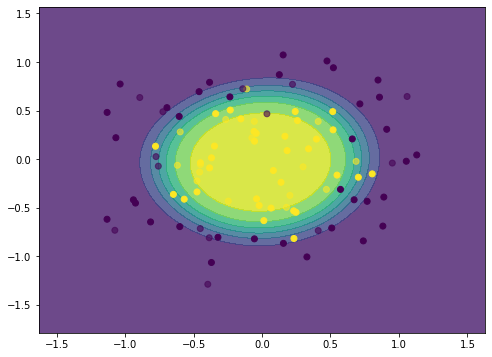

In [22]:
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

Il risultato è totalmente diverso: è riuscito a classificare bene sia gli esempi del train che del test set.

Proviamo a testare anche le altre funzioni kernel, il kernel sigmoidale e polinomiale, anche se l'rbf è sempre migliore di questi.

In [23]:
# kernel sigmoidale:

svc = SVC(kernel = "sigmoid", probability = True) 


svc.fit(X_train, Y_train)

print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY: Train=0.5143 Test=0.4667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


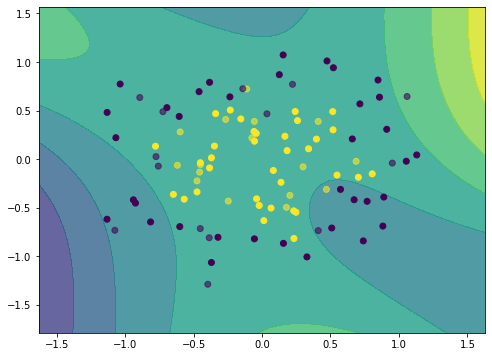

In [24]:
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

I risultati non sono soddisfacenti.


In [26]:
# kernel polinomiale:

svc = SVC(kernel = "poly", probability = True) 


svc.fit(X_train, Y_train)

print("ACCURACY: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY: Train=0.5143 Test=0.4667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


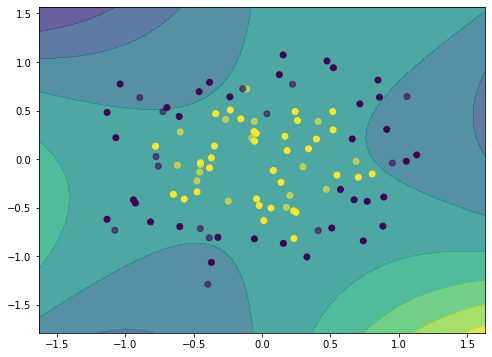

In [27]:
plot_bounds((X_train, X_test),(Y_train, Y_test),svc)

Il risultato non è soddisfacente.

Ci sono comunque rari casi in cui questi kernel danno risultati migliori dell rbf.

## Reti Neurali Artificiali (ANN)

Sono un modello di machine learning bio-inspired, ovvero prende spunto dall'aoparato di apprendimento umano, il cervello.
Il meccanismo con cui funziona il cervello (un processo composto da potenziali di azioni e soglie di attivazione)  è simile ad un modello di classificazione generico, che viene chiamato Percettrone.
In un percettrone, z che è la somma dei prodotti dei pesi per le proprieta è il otensiale d'azione, e la funzione di attivazione costituisce la soglia di attivazione. Infati la funzione di attivazione puo essere vista come una soglia, solitamente di 0.5, che sta all'interno di un range compreso fra 0 e 1 , che appunto se viene superata classifica l'esempio come appartenente alla classe positiva, come abbiamo gia visto con la regressione logistica, che non è altro che un caso particolare di percettrone.
Esistono diverse funzioni di attivazione:
La Step-function
La Sigmoide, che abbiamo visto che è la funzione di attivazione di una regressione logistica
La Rectified Linear Unit (ReLU), che non fa alto che portare a 0 valori di z negativi, oppure la tangente iperbolica, che sembra la sigmoide, ma va a -1 a 1 e non da 0 a 1.

Abbiamo visto come i metodi ensemble c permettono di ottenere un modello robusto mettendo inseiem modelli piu deboli.
Pensiamo di fare una cosa simile con diversi percettroni, cercando di replicare il funzionamento delle reti neurali del nostro cervello. Cosi si ottiene una Rete Neurale Artificiale (ANN),nello specifico un modello noto come Percettrone multistrato (multilayer perceptron, MLP).
C'è un alyer di input con le nostre proprieta. Costruiamo un modello di classificazione inizializzando i pesi ad un valore casuale e normalizzando le proprieta per portarle in un range di valori comoreso fra 0 e 1.
Ogni arco rappresenta un peso. Il modello calcolera il potenziale d'azione, z, sommando i prodotti di pesi e proprieta, ed un attivazione applicando la funzione di attivazione a z.
Potremmo usare il valore cosi ottenuto come la nostra predizione, invece no. Ripetiamo questo processo, sempre inizializzando i nostri pesi ad un valore random, fino ad ottenere 4 modelli, quindi 4 nodi (4 neuroni) (4 è un numero preso a caso...).
Ora abbiamo 4 modelli che ci forniscono 4 output, che sono compresi ne range di valori 0 - 1 perche abbiamo applicato la funzione di attivazione ad ognuno dei modelli. E' lo stesso range delle proprieta, dato che le abbiamo normalizzate. Allora facciamo finta che le 4 attivazioni dei 4 modelli siano le nostre 4 proprieta di input, e usiamole per costruire un nuovo modello e ottenere una predizione, come se stessimo facendo una normale regressione logistica. Otteniamo la regressione della nostra rete neurale. Il livello intermedio è detto Hidden layer, e in questo livello la rete neurale usa pesi e proprieta del layer precedente per scoprire e ostruire nuove proprieta, permettendo alla rete di costruire relazioni non lineari anche molto complesse. 
Il numero di hidden layer e il numero dei neuroni (dei nodi) sono degli iperparametri che dobbiamo ottimizzare. 
Le reti neurali sono un modello estremamente potente quanto difficile da utilizzare ed ottimizzare. Per questo non vanno abusate , ma vanno usate solo quando modelli piu semplici, come la regressione logistica o alberi e foreste si rivelano inefficaci per il problema che stiamo affrontando.
Abbiamo visto che ci sono diverse funzioni di attivazione. La scelta di tale funzione per i vari livelli è un iperparametro da ottimizzare, ma solitamente per il layer di output si usa la sigmoide, dato che restituisce anche la probabilita della correttezza della prediizone, mentre per gli hidden layer si usa la ReLU.

#### Addestramento di una Rete Neurale Artificiale

Iniziamo da un semplice neurone, il percettrone. Come abbiamo gia iso per l'addestramento di un semplicemodello di machine learning possiamo usare l'algoritmo di ottimizzazione Gradient descend, che funziona cosi:
inizializziamo i pesi ad un valore random e facciamo le predizioni per ogni esemi del trainset. Dop di che usiamo la funzione di costo per calcolare l'errore del nostro modello, che inizialmente sara molto alto. Poi facciamo uno step del gradient descend che tende a muovere i pesi verso valori che permettono di ottenere un errore minore, e sostituiamo i pesi cosi ottenuti con i pesi del nostro modello. Rifacciamo le predizioni e ripetiamo il processo per un determinato numero di volte, chiamato Epoche, in una sprta di loop che tendera a rendere l'errore sempre piu basso. Potremmo considerare l'addestramento concluso o quando abbiamo raggiunto il numero id epoche che ci eravamo prefissati, oppure quando l'errore è sufficienteente basso e quindi il modello è sufficientemente valido.
Anche una rete neurale usa il gradient descend per ottimizzare i pesi, ma il discorso è molto piu complicato, e si presenta anche un grosso problema, ovvero che per eseguire il gradient descend è necessario sapere quanto il peso influenza l'errore della rete. Per un singolo percettrone non è un problema, ma per una rete neurale costituita da piu percettroni interconnessi lo è, infatti bisogna avere questa informazione per ogni peso di ogni layer, e non soltando di quelli direttamente connessi al layer di output.
La BACKPROPAGATION affronta questo problema in maniera efficacie:
propaga il segnale in avanti, ovvero da sinistra a destra, in un processo chiamato forward propagation, che non è altro che eseguire le predizioni. Calcolando poi l'errore della rete e facendo viaggiare questo valore indietro, da destra a sinistra, in un processo chiamato backward propagation.
La matematica dietro alla Back Propagation è molto complessa. Quello che va tenuto in mente è che ci permette di sapere in che modo ogni peso di ogni nodo ha influenzato l'errore della rete, e sapendo questo possiamo utilizzare questo valore per eseguire il gradient descend ed aggiornare il valore dei pesi della rete in contemporanea.

Poi fa vedere l'esempio della creazione di una rete neurale senza dover scrivere nessun codice, sul sito playground.tensorflow.org.


### Multilayer perceptron in Python

implementiamo un percettrone multistrato per classificare un dataset di immagini di cifre scritte a mano.
Un rete neurale artificiale ha bisogno di un elevatissimo numero di esempi per poter essere addestrato correttamente. Per questo usiamo il dataset MNIST, che va scaricato da un sito.


In [40]:
# importiamo le librerie necessarie:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [45]:
# i file scaricati sono in formato binario, e quindi per ottenere gli array numpy sfruttiamo
# una funzione scritta dal tipo del video:

import numpy as np
import os
import struct

def load_mnist(path="/"):
    
    train_labels_path = os.path.join(path,"train-labels-idx1-ubyte")
    train_images_path = os.path.join(path,"train-images-idx3-ubyte")
    
    test_labels_path = os.path.join(path,"t10k-labels-idx1-ubyte")
    test_images_path = os.path.join(path,"t10k-images-idx3-ubyte")
    
    labels_path = [train_labels_path, test_labels_path]
    images_path = [train_images_path, test_images_path]
        
    labels = []
    images = []
        
    for path in zip(labels_path, images_path):
        
        with open(path[0],'rb') as lbpath:
            magic, n = struct.unpack('>II', lbpath.read(8))
            lb = np.fromfile(lbpath, dtype=np.uint8)
            labels.append(lb)
            
        with open(path[1], 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
            images.append(np.fromfile(imgpath, dtype=np.uint8).reshape(len(lb), 784))
            
    return images[0], images[1], labels[0], labels[1]


In [48]:
# ora la usiamo per ottenere il trainset e il testset:
X_train, X_test, Y_train, Y_test = load_mnist(path="MNIST")

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST\\train-labels-idx1-ubyte'

#### Non riesco ad andare avanti...penso che il problema sia legato alle directory dove stanno i file e i moduli che devo richiamare...
#### boh...